In [1]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Average, Dropout
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

/home/fineral/.conda/envs/myenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.
x_test = x_test / 255.
encoded_y_train = to_categorical(y_train, num_classes=10)

In [4]:
shape = 'x_train shape: {} | encoded_y_train shape: {}\n'
shape += 'x_test shape : {} | y_test shape : {}'
print(shape.format(x_train.shape, encoded_y_train.shape, x_test.shape, y_test.shape))

x_train shape: (60000, 28, 28) | encoded_y_train shape: (60000, 10)
x_test shape : (10000, 28, 28) | y_test shape : (10000,)


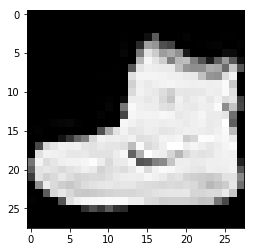

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
plt.imshow(x_train[0,:,:],cmap='Greys_r')
plt.show()
print(y_train[0])
print(encoded_y_train[0])

In [6]:
def compile_and_train(model, num_epochs): 
    model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc']) 
    filepath = 'weights/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_weights_only=True, save_best_only=True, mode='auto', period=1)
    tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0, batch_size=32)
    history = model.fit(x=x_train, y=encoded_y_train, batch_size=32, epochs=num_epochs, verbose=1, callbacks=[checkpoint, tensor_board], validation_split=0.2)
    return history

In [7]:
x_train = x_train.reshape(60000,28,28,1)
input_shape = x_train[0,:,:,:].shape # 28 by 28
print(x_train.shape)
model_input = Input(shape=input_shape)

(60000, 28, 28, 1)


In [12]:
def second_cnn(model_input):
    
    x = Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same', strides = 2)(model_input)
    x = MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(4*96, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
    x = MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = Conv2D(4*96, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
    x = Conv2D(10, (1, 1), strides = 2)(x)
    x = GlobalAveragePooling2D()(x)
    x = Activation(activation='softmax')(x)
    
    model = Model(model_input, x, name='second_cnn')
    
    return model

In [13]:
second_model = second_cnn(model_input)

In [14]:
_ = compile_and_train(second_model, num_epochs=6)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 11s 235us/step - loss: 0.5493 - acc: 0.7957 - val_loss: 0.3733 - val_acc: 0.8624
Epoch 2/6
48000/48000 [==============================] - 11s 231us/step - loss: 0.3516 - acc: 0.8701 - val_loss: 0.3333 - val_acc: 0.8795
Epoch 3/6
48000/48000 [==============================] - 12s 252us/step - loss: 0.3113 - acc: 0.8844 - val_loss: 0.3339 - val_acc: 0.8789
Epoch 4/6
48000/48000 [==============================] - 11s 229us/step - loss: 0.2819 - acc: 0.8938 - val_loss: 0.2901 - val_acc: 0.8957
Epoch 5/6
48000/48000 [==============================] - 11s 232us/step - loss: 0.2616 - acc: 0.9021 - val_loss: 0.2943 - val_acc: 0.8907
Epoch 6/6
48000/48000 [==============================] - 11s 228us/step - loss: 0.2460 - acc: 0.9079 - val_loss: 0.2724 - val_acc: 0.8982
